**Zomato** is an online food delivery app which gives users the ratings and the reviews on restaurants all over India. We will consider Banglore city in this analysis. 

We want to get a fair idea about the factors affecting the esablishment of different types of restaurants at different places in Bengaluru, aggregating rating for each rerstaurant. 

Data is taken from Kaggle. Scraped from Zomato weebsite (March, 2019). Theree are 7 cateegory of reestaurants: Buffet, Cafes, Delivery, Deesserts, Dine-out, Drinks & nightlife, Pubs and bars.

We want to analyse such factor as:

- How Location of the restaurant affects the rating
- Approx Price of food
- Theme based restaurant or not
- Which locality of that city serves that cuisines with max number of restaurants
- The needs of people who are striving to get the best cuisine of the neighborhood
- Is a particular neighborhood famous for its own kind of food

**Main objectives** of this project: 

   1. Perform **Exploratory Data Analysis (EDA)**.
   2. Build a **ML model** that will help various Zomato Restaurants to predict their respective Ratings based on certain features.
   3. **Deploy** the Machine Learning model via **Flask** that can be used to make live predictions of restaurants ratings.

In [232]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [233]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Columns description**

1. **url** - url of the restaurant on zomato website
2. **adress** - adress of the restaurant in Bengaluru
3. **name** - name of the restaurant 
4. **online_order** - if the online ordering is available in the restaurant or not
5. **book_table** - table book option available or not
6. **rate** - overall rating of the restaurant out of 5
7. **votes** - total number of votes for the rating
8. **phone** - phone numer of the restaurant 
9. **location** - neighborhood where the restaurant is located
10. **rest_type** - restaurant type
11. **dish_liked** - dishes people liked in the restaurant 
12. **cuisines** - food styles, separated by comma 
13. **approx_cost** - approximated cost for two people
14. **reviews_list** - list of tuples containing reviews, each tuple
15. **menu_item** - the name of the restaurant 
16. **listed_in(type)** - type of meal
17. **listed_in(city)** - location



### 1. Exploratory Data Analysis

- 1.1. Preparing the dataset
    - Checking for duplicates
    - Droping Null Values
    - Renaming columns
    - Cleaning the dataset
- 1.2. Visualisations
    - Restaurants chains, Online booking table, Online delivery
    - Rating Distributions
    - Services Types
    - Distribution of Cost of Food for two people
    - Most Liked Dishes
    
### 2. Building the model



### 1. Exploratory Data Analysis

### 1.1. Preparing the dataset

In [234]:
data.shape

(51717, 17)

In [235]:
data.dtypes # checking data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [236]:
data.isna().sum() #checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [237]:
# import pandas_profiling as pf

# pf.ProfileReport(data)

In [238]:
# deleting unnecessary columns 
df = data.drop(['url', 'phone'], axis = 1)

**Checking for duplicate valuese**

In [239]:
df.duplicated().sum()

43

In [240]:
df.drop_duplicates(inplace=True)

In [241]:
df.duplicated().sum()

0

**Drop Null values**

?We could also inplace some Null values, but maybe later.

In [242]:
df.dropna(how='any', inplace = True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [243]:
df.shape

(23395, 15)

**Renaming columns appropriately**

In [244]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [245]:
df = df.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city' })

In [246]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [247]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


**Cleaning the dataset**

In [248]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [249]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',', ''))
df['cost'] = df['cost'].astype(float)

In [250]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [251]:
# reading unique values from the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [252]:
df = df.loc[df.rate != 'NEW'] #getting rid of "New"

In [253]:
# removing "/5"

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'] = df['rate'].astype(float)

In [254]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### 1.2. Visulaisations 

#### Restaurants chains, Online booking table, Online delivery

Most famous restaurants chains in Bagaluru

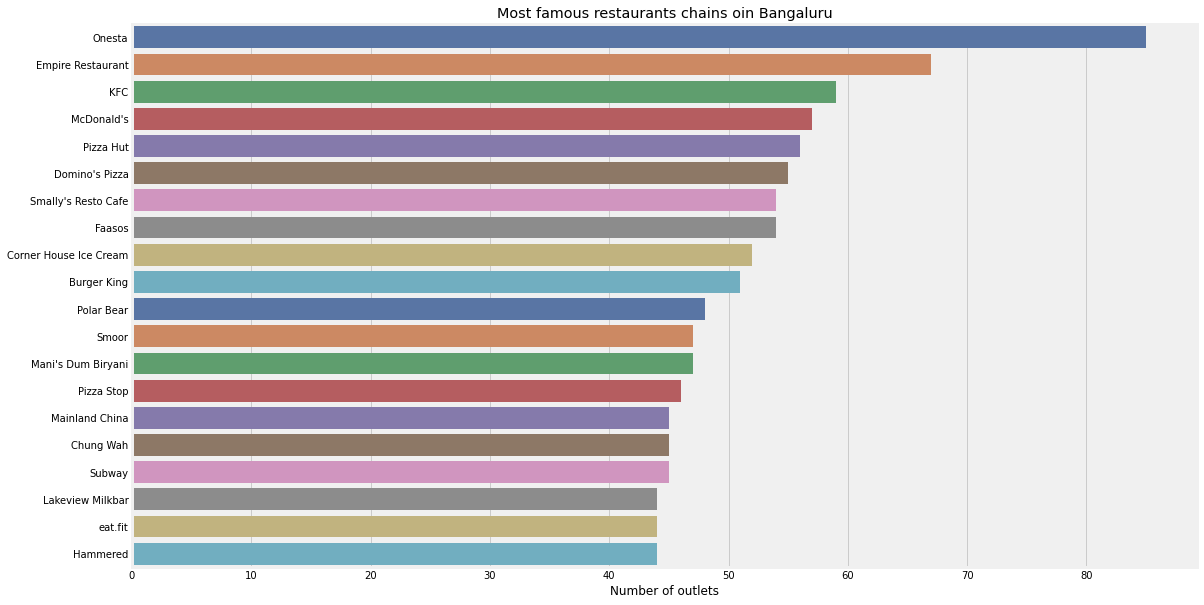

In [255]:
plt.figure(figsize = (17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains, y = chains.index, palette = 'deep')
plt.title('Most famous restaurants chains oin Bangaluru')
plt.xlabel('Number of outlets')
plt.show()

Whether restaurant offer Table booking or not

In [256]:
x = df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace = go.Pie(labels = x.index, values = x, textinfo = 'value',
                      marker = dict(colors=colors, line = dict(color = '#001000', width = 2)))
layout = go.Layout(title = 'Table booking', width = 600, height = 600)
fig = go.Figure(data=[trace], layout = layout)
py.iplot(fig, filename = 'pie_chart_subplots')

**Insight:**
    
- Most of the restaurants do not offer table booking

Whether Restaurants deliver online or not

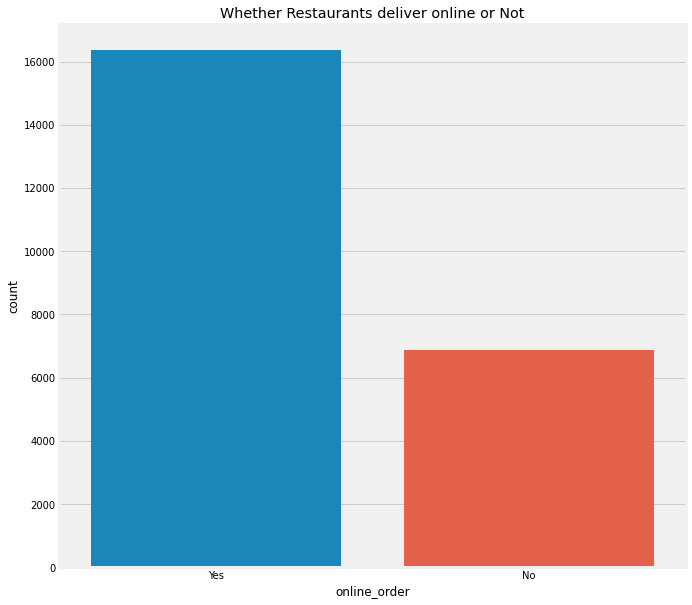

In [257]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

**Insight:**

   - Most Restaurants offer option for online order and delivery

#### Rating distributions

<AxesSubplot:xlabel='rate', ylabel='Density'>

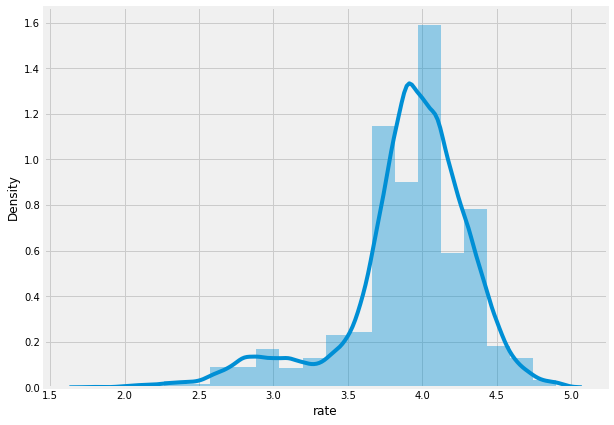

In [258]:
plt.figure(figsize = (9,7))

sns.distplot(df['rate'], bins = 20)

**Insight:**

   - We can infer from above that most of ratings are within 3.5 and 4.5

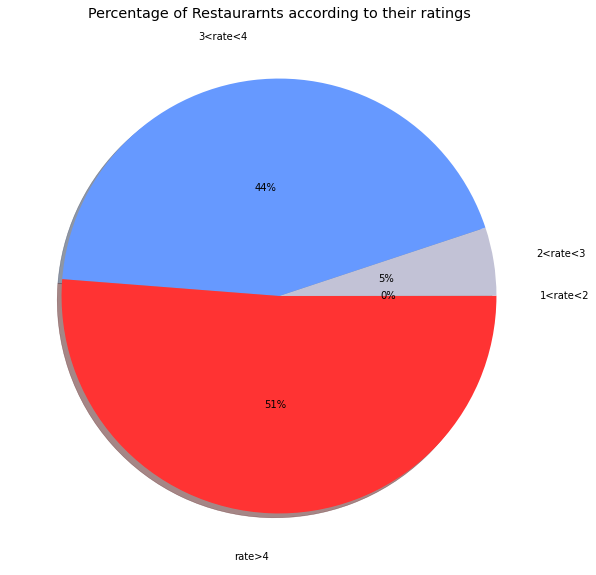

In [259]:
slices = [ ((df['rate']>=1) & (df['rate']<2)).sum(),
           ((df['rate']>=2) & (df['rate']<3)).sum(),
           ((df['rate']>=3) & (df['rate']<4)).sum(),
           (df['rate']>=4).sum()
         ]

labels = ['1<rate<2', "2<rate<3", '3<rate<4', 'rate>4']
colors = ['#ff3333', '#c2c2d6', '#6699ff']
plt.pie(slices, colors = colors, labels = labels, autopct ='%1.0f%%',
       pctdistance =.5, labeldistance=1.2, shadow = True)
fig = plt.gcf()
plt.title('Percentage of Restaurarnts according to their ratings')

fig.set_size_inches(10,10)
plt.show()

**Services Types**

Text(0.5, 1.0, 'Type of Service')

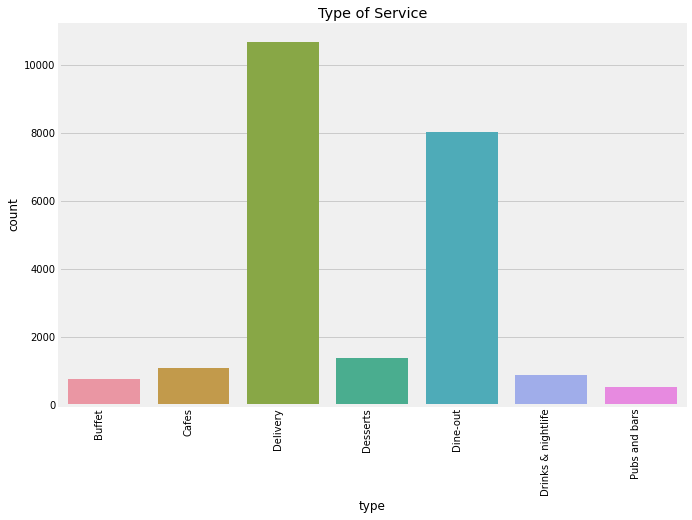

In [260]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha='right')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title('Type of Service')

**Insight:**
    
   - Here the two main service types are **Delivery** and **Dine-out**
   
#### Distribution of Cost of Food for two People

In [261]:
from plotly.offline import iplot

In [262]:
trace0 = go.Box(y = df['cost'], name = '',
               marker = dict(color = 'rgb(113, 10, 100)'))
data0 = [trace0]
layout = go.Layout(title='Box plot of apprroximate cost', width = 800, height = 800,
                  yaxis = dict(title = 'Price'))
fig = go.Figure(data=data0, layout=layout)
py.iplot(fig)

We suppose to have maximum cost = 1900, but we still have some outliers (till 6000). 

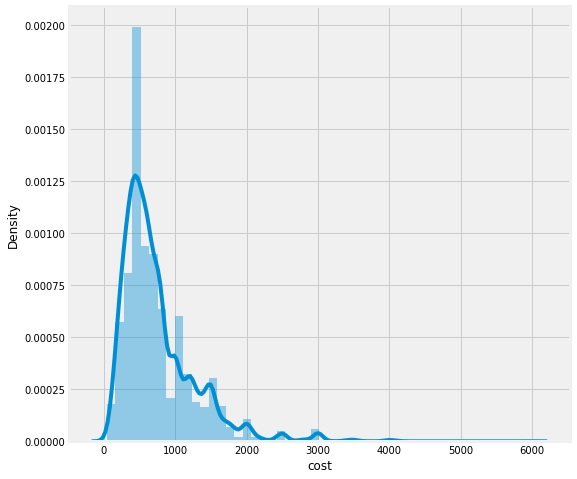

In [263]:
plt.figure(figsize = (8,8))
sns.distplot(df['cost'])
plt.show()

**Most Liked Dishes**

In [264]:
import re #re=regular expression, used for splitting words

df.index = range(df.shape[0])
likes = []
for i in range(df.shape[0]):
    array_split = re.split(',', df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [265]:
print('Count of Most Liked dishes in Bangalore:')
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most Liked dishes in Bangalore:


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

In [266]:
favourite_food.shape

(3494,)

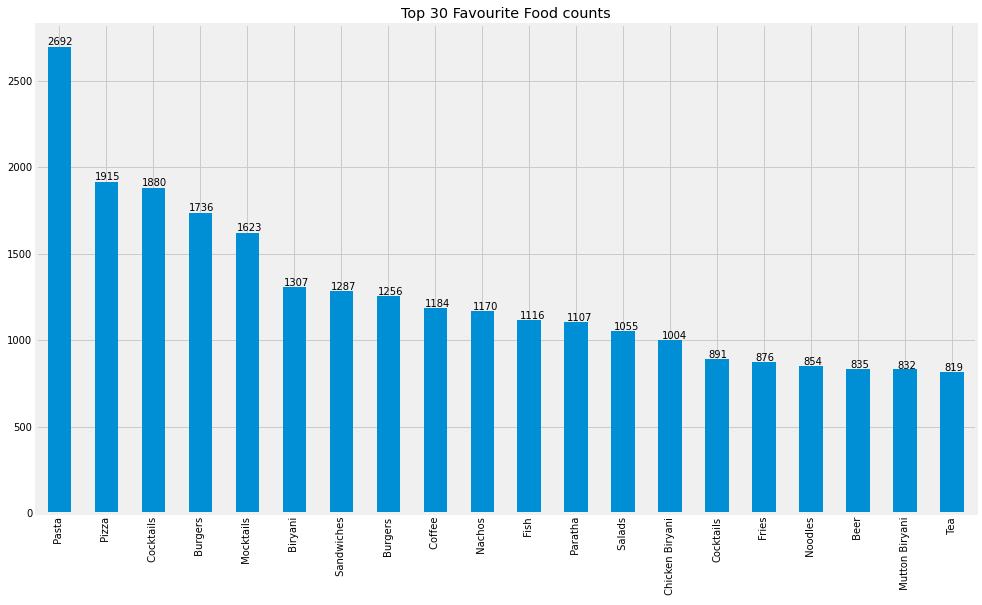

In [267]:
ax = favourite_food.nlargest(n=20, keep ='first').plot(kind='bar', figsize = (15,9),
                                    title = 'Top 30 Favourite Food counts')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()*1.005, i.get_height()*1.005))

We can infer from the analysis that the 5 most liked dishes are **Pasta, Pizza, Cocktails, Burgers** and **Mocktails**.

**Restaurants and their counts**

Text(0.5, 0, 'count')

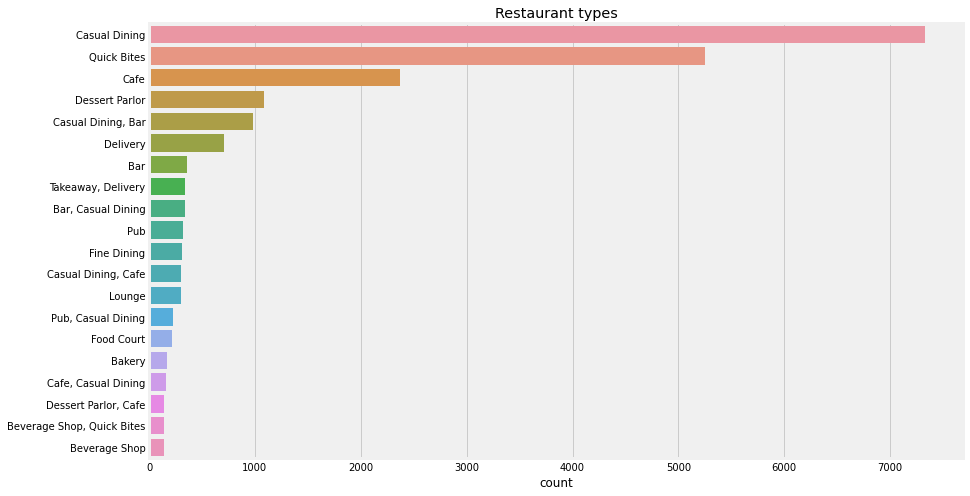

In [268]:
plt.figure(figsize =(13,8))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest, rest.index)
plt.title('Restaurant types')
plt.xlabel('count')

**Casual Dining, Quick Bites** and **Cafe** are the 3 most common types of Restaurants in Banglore

### 2. Building the model
    
   - Converting categorical variables into a numeric format
   - Selecting columns for the model, Spleating the dataset
   - Linear Regression
   - Decision Tree
   - Random Forest
   - ExtraTree Regression
   - Saving the model

In [269]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


**Converting categorical variables into a numeric format**

In [270]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0

In [271]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [272]:
df.online_order = pd.to_numeric(df.online_order)

In [273]:
df.book_table[df.book_table == 'Yes'] = 1
df.book_table[df.book_table == 'No'] = 0

df.book_table = pd.to_numeric(df.book_table)

In [274]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [275]:
df.head(40)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,1,0,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,1,1,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
7,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,1,0,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
8,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,1,0,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
9,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1,0,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


**Label Encoding of the categorical variables**

In [276]:
import numpy as np 
loc_sort = np.sort(df.location.unique())
rest_type_sort = np.sort(df.rest_type.unique())
cus_sort = np.sort(df.cuisines.unique())
menu_item_sort = np.sort(df.menu_item.unique())

In [277]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [278]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [279]:
print('Number of locations:', len(df.location.unique()))
print('Number of Restaurant types:', len(df.rest_type.unique()))
print('Number of Cuisines:', len(df.cuisines.unique()))
print('Number of Menu Items:', len(df.menu_item.unique()))
print('Numere of total records in the dataset:', df.shape[0])

Number of locations: 88
Number of Restaurant types: 73
Number of Cuisines: 1681
Number of Menu Items: 5048
Numere of total records in the dataset: 23248


In [280]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari


**Selecting columns for our model, Spleating the dataset**

In [281]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')


In [283]:
x = my_data.iloc[:, [0,1,3,4,5,6,7,8]]
y = my_data['rate']
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [284]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=10)

**Linear Regression**

In [285]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [287]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(x_test)
r2_score(y_test, y_pred)

0.2281882852296705

22% is quite bad perfomance for the model.

**Decision Tree**

In [288]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
r2_score(y_test, y_pred)

0.8726885434802405

**Radom Forest**

In [290]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=650, random_state=10, min_samples_leaf=.0001)
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
r2_score(y_test, y_pred)

0.8811839851398704

**ExtraTree Regressor**

In [291]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(x_train, y_train)
y_pred = ET_model.predict(x_test)
r2_score(y_test, y_pred)

0.9340085216530726

ExtraTree gives us the best model (93%)

**Saving the model**

In [293]:
import pickle
pickle.dump(ET_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl','rb'))